In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import math

# **PHYS 481 - Assignment 3**
## **Josh Houghton**


---



---



# **Introduction**

In this Assignment, I explore several topics in regard to randomness. Specifically, I use Python to explore psuedo-random number generators, and cellular automata.


# **Problem 2.4.2 - Testing other PRNGs**



## **Methodology**

For this assignment problem, I was tasked with exploring the randomness of some other PRNGs. This was done in two parts, first being concerned with the Randu PRNG, and secondly a PRNG that has a seed problem. The methodology for each part of the problem are split up accordingly in the paragraphs.

---
To do this part of the problem, we were not allowed to resort to the hyperplane method. Based on the results of the hyperplane method in the notes, it was clear that there is some repetitive pattern occuring when every three bits are considered to be in one of three dimensions, say $x$, $y$, and $z$. Upon analyzing the algorithm from a mathematical standpoint, I was able to find some interesting results. If we consider the seed to be $x_i$, and the following two randomly generated numbers to be $y_i$ and $z_i$, we can write the following (ignoring the mods):

$$\text{seed} =x_i$$

$$y_i = (2^{16}+3) x_i$$

$$z_i = (2^{16}+3)(2^{16}+3)x_i$$

Where we have replaced $y_i$ in the third line by it's expression in terms of $x_i$. As mentioned, I am ignoring the mods just for simplicity, but the algebra is all the same when they are included. Now, notice that we can rewrite our expression for $z_i$ as

$$z_i = (2^{32}+6*2^{16}+9)x_i$$
$$z_i = 6y_i-9x_i$$

Which by inspection, is a general equation of a plane in 3D. This was interesting, as from the notes we found that when we split the randomly generated numbers into 3 dimensions, we found that the numbers ended up being arranged into planes when plotted in 3D space. If the PRNG was truly evenly sampling over 3 dimensions, the number of solutions to the following generalized equation should theoretically approach infinity (or at least be very large).

$$9x_i-6y_i+z= S$$

where S denotes a solution. With all of this theory out of the way, all that was left for me to do is test it, which I did using my code. I go more in depth on the specific methods used to do this, but essentially I just ran the Randu PRNG, assigning each number to be either $x$, $y$, or $z$, and then found all of the solutions to the above equation, to give me insight into the hidden symmetry within this PRNG.

---
The second part of this problem was a lot simpler. Knowing that for a certain 'bad seed', the specified PRNG would simply get stuck in a loop of repeating the same number, I first created code that would find the bad seed. Again, the details are explained in comments, but essentially the program iterates over many different seeds, checking that the PRNG is working properly, and when a seed arises that results in the same number being repeated, the program stops iterating and stores the seed that it occured on. After this, all that was left to do was use this seed to compute a larger list of random numbers, and plot it to make sure that we had found the correct seed. I also plotted the PRNG results for a different seed, just to observe that for other seeds it does indeed work properly and sample uniformly.



## **Code**

In [ ]:
# 2.4.2 Part A

'''Defining function that will group the random numbers generated by Randu in to 3 distinct groups, x y and z, and
then find all solutions to the equation specified above based on the resulting values. Returns a list of all solutions'''
def find_solutions_randu(nsamples, seed, multval, modval, scale):
    sequence = np.zeros(nsamples, dtype=np.int32)
    # Sets the first number equal to the seed, and computes the following two, since we are working in groups of 3
    sequence[0] = seed
    sequence[1] = multval*sequence[0] % modval
    sequence[2] = multval*sequence[1] % modval

    '''Loop that iterates over the number of samples specified. In each iteration
    the solution to the equation that I derived is computed, and added to a list
    that will keep track of all solutions'''
    solutions = []
    for i in range(3,nsamples,3):
        sol = (sequence[i-1] - 6*sequence[i-2] + 9*sequence[i-3]) / modval
        solutions += [sol]
        
        if i < nsamples-1:
          sequence[i] = multval*sequence[i-1] % modval
        else:
          break
        if i < nsamples-1:
          sequence[i+1] = multval*sequence[i] % modval
        else:
          break
        if i < nsamples-1:
          sequence[i+2] = multval*sequence[i+1] % modval
        else:
          break
    # if scale is true the list of numbers is scaled down to be between 0 and 1
    if scale:
        sequence = sequence / np.double(modval)
    
    return solutions


# Initializes parameters according to Randu algorithm
nsamples = 10**6 
seed = 100
multval = 65539
modval = 2**31
scale = True

'''This block first uses the find_solutions function to create a list of all solutions
then it makes a new list that contains only the unique solutions by getting rid of all
repeated solutions, and finally sorts the list of solutions in ascending order'''
randu_solutions = find_solutions_randu(nsamples, seed, multval, modval, scale)
unique_solutions = list(set(randu_solutions))
unique_solutions = [int(item) for item in unique_solutions]
unique_solutions.sort()

# Prints several results, including all unique solutions
print("Total Number of Solutions Computed:",len(randu_solutions))
print("")
print("Total Number of UNIQUE Solutions:",len(unique_solutions))
print("")
print("The Only Unique Solutions are as follows:")
print("")
for i in range(len(unique_solutions)):
  print("\t9x-6y+z =",unique_solutions[i])
  

print("")
print("These",len(unique_solutions),"equations correspond to the",len(unique_solutions),"planes that are visualized \nby splitting every 3rd number that is generated in to one of three \ndimensions, and plotting them in 3D space, as was done in the notes.")

Total Number of Solutions Computed: 333333

Total Number of UNIQUE Solutions: 15

The Only Unique Solutions are as follows:

	9x-6y+z = -5
	9x-6y+z = -4
	9x-6y+z = -3
	9x-6y+z = -2
	9x-6y+z = -1
	9x-6y+z = 0
	9x-6y+z = 1
	9x-6y+z = 2
	9x-6y+z = 3
	9x-6y+z = 4
	9x-6y+z = 5
	9x-6y+z = 6
	9x-6y+z = 7
	9x-6y+z = 8
	9x-6y+z = 9

These 15 equations correspond to the 15 planes that are visualized 
by splitting every 3rd number that is generated in to one of three 
dimensions, and plotting them in 3D space, as was done in the notes.


Entropy = 16.99997373416288
Clearly, for a seed of 100, this PRNG does a good job at uniformly sampling.



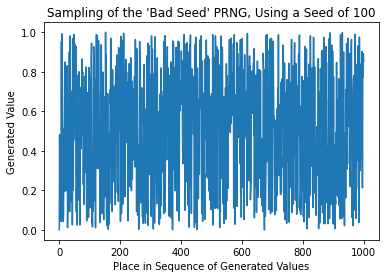

In [ ]:
# 2.4.2 Part B

# Defines the same entropy function as that in the notes, which takes a datalist and returns the entropy
def symbol_entropy(datalist):
    hist = {}
    for item in datalist:
       if item not in hist:
         hist[item] = 1
    else:
         hist[item] += 1   
    counts = np.array( [hist[item] for item in hist])
    prob = counts / np.sum(counts)
    prob = prob[ prob != 0 ] #; print(prob)
    entropy = -np.sum( prob * np.log2(prob) )
    return entropy

'''defines a function similar to our previous PRNG, but this time
uses the evolution algorithm specified for this problem, which is said
to result in an issue for one seed. Returns an array of psuedo-random 
numbers of length specified by the nsamples parameter'''
def badSeed_prng(nsamples, seed, multval, modval, scale):
    sequence = np.zeros( nsamples, dtype=np.int32 )
    sequence[0] = seed
    for i in range(1,nsamples):
        sequence[i] = (multval*sequence[i-1] + 1) % modval   
    if scale:
        sequence = sequence / np.double(modval)

    return sequence

# Initiating all parameters according to this certain PRNG
nsamples = 10**6
multval = 9806
modval = 2**17 - 1
scale=True

'''Sets the seed. I have left it as 100 for demonstration, however
this PRNG appears to evenly sample for pretty much any choice of a
seed (except the bad seed of course, which we will see shortly).'''
seed = 100

'''Creates a list of psuedo-random numbers using our functon and calls it x'''
x = badSeed_prng(nsamples, seed, multval, modval, scale)

# Plotting instructions to plot the sampling of the generated numbers
fig1 = plt.plot(x[0:1001])
plt.xlabel("Place in Sequence of Generated Values")
plt.ylabel("Generated Value")
plt.title("Sampling of the 'Bad Seed' PRNG, Using a Seed of "+str(seed))

# Calculates the entropy and prints it
entropy = symbol_entropy(x)
print("Entropy =",entropy)

print("Clearly, for a seed of "+str(seed)+", this PRNG does a good job at uniformly sampling.")
print("")

THE BAD SEED IS: 37911

If this PRNG is used with a seed of 37911 the PRNG breaks, 
and the result is the same number repeating over and over again. 
A list of the first 10 results is printed below:

[37911 37911 37911 37911 37911 37911 37911 37911 37911 37911]

Shannon Entropy = -0.0



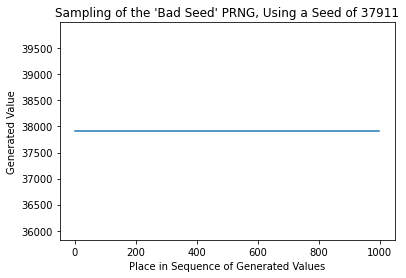

In [ ]:
# 2.4.2 Part B Continued

'''This block of code finds the bad seed using the following method. It iterates over many possible
seeds, each time, computing a list of 9 psuedo-random numbers. In the assignment, it was specified
that the bad seed results in the same number being repeated. Thus, the code then converts the list 
into a list containing ONLY THE UNIQUE psuedo-random numbers. Obviously, if the numbers have began
to repeat, this will be a shorter list. If this condition is met, the bad seed is printed and the 
loop is broken'''
nsamples = 9
seed = 1
for i in range(1,100000):
  x = badSeed_prng(nsamples, seed, multval, modval, scale)
  x = list(set(x))
  if len(x) < 8:
    bad_seed = i
    print("THE BAD SEED IS:",bad_seed)
    print("")
    break
  seed += 1



'''The rest of the code simply uses the exact same method as the last cell to calculate
a list of psuedo-random numbers, but this time it uses the previously found "bad seed" as
the seed. This allows us to plot the sampling of this PRNG for the bad seed'''
seed = bad_seed
nsamples = 1000

x = badSeed_prng(nsamples, seed, multval, modval, scale=False)

print("If this PRNG is used with a seed of",bad_seed,"the PRNG breaks, \nand the result is the same number repeating over and over again. \nA list of the first 10 results is printed below:")
print("")
print(x[:10])

fig2 = plt.plot(x[0:999])
plt.xlabel("Place in Sequence of Generated Values")
plt.ylabel("Generated Value")
plt.title("Sampling of the 'Bad Seed' PRNG, Using a Seed of "+str(bad_seed))
entropy = symbol_entropy(x)
print("")
print("Shannon Entropy =",entropy)
print("")

## **Results & Discussion**

For the first part of this problem, my code was able to succesfully compute all of the solutions to the previously mentioned equation, that are generated by the Randu algorithm. Interestingly, it found that there are only 15 unique solutions, which correspond to 15 different planes. Therefore, the Randu PRNG only generates numbers that lie within one of these 15 planes, which is clearly a large issue. The validity of my results can be displayed best in the plot of Randu in 3D sliced for $z>0$, which was done in the notes. We see that the numbers are split into 15 different planes, which corresponds identically to my results!

As for the second part of this problem, I was able to quite easily find the bad seed, which is 37911. After doing so, I ran some tests just to make sure that this indeed was a problem only for this seed. From my graph and other results while using a seed of 100, we can see that this PRNG does a good job of generating psuedo-random numbers; the entropy is close to a maximum, and the graph demonstrates uniform sampling. However, when I performed the same analysis using the bad seed, it is obvious that there is an issue. As specified by the statements printed out by the code, when 37911 is used for a seed, the PRNG repeatedly generates 37911, and there is no variation at all (as seen in the graph for 1000 generated numbers).


# **Problem 2.4.3 - Testing Shuffle Code from Assignment 1**

## **Methodology**

For this problem, I was tasked with analyzing the shufflling algorithm that I created in Assignment 1, specifically in regard to how random the algorithm truly was. I tested my algorithm according to the assignment specifications, completing 7 shuffles each using a random location for the deck split. Note that from here on, when I mention a deck shuffle, I am actually referring to the process of shuffling 7 times using my algorithm.

To approach this problem, I performed many shuffles of the deck, and stored each of the results. By converting each shuffle result (list) to a string, I found that it became easier to analyze these results. That way, I could view each possible order of the deck as a possible outcome, and each result that I got as a 'psuedo-generated result'. Obviously this is not perfectly analogous to what was done in the previous probelm, for example; consider a deck of 6 cards from 1-6. Obviously, if we view the result as an integer, the lower bound is 123456 and the upper bound is 654321. Therefore, converting the reuslts to strings made more sense, as each combination doesn't really have any deeper meaning other than just that: it is just a certain combination.

By performing the shuffle many times, and creating a list of all of the results, I was then able to perform analysis similarly to how we have done in the past. I calculated the entropy according to how many times certain combinations appeared in the results. I also was able to compute the theoretical entropy of each deck size, according to Shannon's theorem. Not only could I use the many resulting deck combinations to calculate the entropy, but I also was able to plot them in the same matter that was done for the previous PRNGs. I figured that being able to visualize the results of this algorithm graphically would provide some insight into it's properties, which turned out to be true, as will be discussed in the section following my code cells.

As usual, all specific coding methods applied for this problem are included in more detail in the comments.





## **Code**

In [ ]:
# 2.4.3

# NOTE: EVERYTHING BETWEEN THE TWO LINES BELOW IS COPY/PASTED FROM ASSIGNMENT 1
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''
'''Defines a function that will shuffle a "deck" (list of integers)
The function takes two arguements, deck and cut. The deck arguement is the list/deck
that is to be shuffled. The cut arguement takes an integer representing where the                         
deck will be split.'''
def bridge_shuf(deck, cut):                                                                                  
  # creating two new lists representing each side of the original deck based on the cut parameter      
  leftDeck = deck[:-cut]
  rightDeck = deck[-cut:]

  # creates an empty list which will be used in the following loop                                            
  deck_0 = []

  # initializing a loop that iterates over number specified for the cut
  for j in range(cut):

    # creates a new deck ranging from the integer value (rounded) of the difference between
    # the deck size and the number used for cut, multiplied by the current index of iteration
    # to that multiplied instead by the current iteration plus one
    deck_1 = leftDeck[j*int((deckSize - cut) / cut ) : (j+1)*int((deckSize - cut) / cut )]

    # adds the index of the second half of the split deck to the new deck based on
    # the current iteration
    deck_1 += [rightDeck[j]]

    # adds the placeholder deck to the deck_0 to complete the switch of cards for this iteration
    deck_0 += deck_1
 
  # adds the remainder of the original deck to the end of the new deck to complete
  # the current shuffle
  deck_0 += leftDeck[(j+1)*int((deckSize - cut) / cut ) : deckSize + 1]

  return deck_0
''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''

'''This function takes a deck (list) as an arguements, and shuffles it 7 times
using the riffle shuffle I made for Assignment 1. For each shuffle, the location of
the cut is a random card within the deck. It returns the deck after being shuffled 7 times'''
def seven_shuffles(deck):
  seed_min = deck[0]
  seed_max = deck[-1]
  for i in range(7):
    seed = random.randint(seed_min,seed_max)
    deck = bridge_shuf(deck,seed)
  shuffled_deck = deck
  return shuffled_deck

''' This function iterates over the specified number of samples. For each iteration, the 
deck is shuffled 7 times using the previous function. The shuffled deck for the current
iteration is then converted into a string that contains all of the numbers of the shuffled deck
in the shuffled order. Then at the end of the iteration, this string (deck variation) is added
to a list, x, for plotting'''
def compute_results(deck,nsamples):
  x = []
  samples = []
  for i in range(nsamples):
    result = ''.join(map(str, seven_shuffles(deck)))
    x += [result]
    samples += [i+1]
  return x, samples


'''I defined this function so that I could test my results for different deck sizes and
display them acccordingly. First it calculated the theoretical max entropy based on the
number of possible deck combinations. It will print this, and then plot the results of
the previous function for 4 different numbers of samples, to see how the randomization
changes with sample size.'''
def full_test(deckSize):
  coms = math.factorial(deckSize)
  shannon = math.log(coms,2)
  print("Theoretical Maximum Entropy:", shannon)
  print("")

  deck = []
  for i in range(deckSize):
    deck += [i+1]

  OG_DECK = deck


  '''Everything below here is just plotting instructions. It looks complicated because
  I wanted to vary the number of samples in a specific way, so I couldn't do it in a loop
  but essentially it just calculates the shuffle results for 1000, 5000, 10000, and 40000
  samples and plotted the results'''
  fig, axs = plt.subplots(2,2, figsize = (15,12))
  axs = axs.flatten()

  x, samples = compute_results(OG_DECK, 1000)
  entropy = symbol_entropy(x)
  axs[0].plot(samples,x,"o",markersize=1)
  axs[0].set_title("Shuffle Results for 1000 Samples")
  axs[0].text(0.3, 0.9, 'Entropy = '+str(entropy),fontsize=11,color='red',bbox=dict(facecolor='white',alpha=1), horizontalalignment='center', verticalalignment='center', transform=axs[0].transAxes)

  x, samples = compute_results(OG_DECK, 5000)
  entropy = symbol_entropy(x)
  axs[1].plot(samples,x,"o",markersize=1)
  axs[1].set_title("Shuffle Results for 5000 Samples")
  axs[1].text(0.3, 0.9, 'Entropy = '+str(entropy),fontsize=11,color='red',bbox=dict(facecolor='white',alpha=1), horizontalalignment='center', verticalalignment='center', transform=axs[1].transAxes)

  x, samples = compute_results(OG_DECK, 10000)
  entropy = symbol_entropy(x)
  axs[2].plot(samples,x,"o",markersize=1)
  axs[2].set_title("Shuffle Results for 10000 Samples")
  axs[2].text(0.3, 0.9, 'Entropy = '+str(entropy),fontsize=11,color='red',bbox=dict(facecolor='white',alpha=1), horizontalalignment='center', verticalalignment='center', transform=axs[2].transAxes)

  x, samples = compute_results(OG_DECK, 40000)
  entropy = symbol_entropy(x)
  axs[3].plot(samples,x,"o",markersize=1)
  axs[3].set_title("Shuffle Results for 40000 Samples")
  axs[3].text(0.3, 0.9, 'Entropy = '+str(entropy),fontsize=11,color='red',bbox=dict(facecolor='white',alpha=1), horizontalalignment='center', verticalalignment='center', transform=axs[3].transAxes)

  for i in range(4):
    axs[i].set_yticks("")
    axs[i].set_ylabel("Shuffle Result")
    axs[i].set_xlabel("Sample")

Results for a Deck Size of 6

Theoretical Maximum Entropy: 9.491853096329676



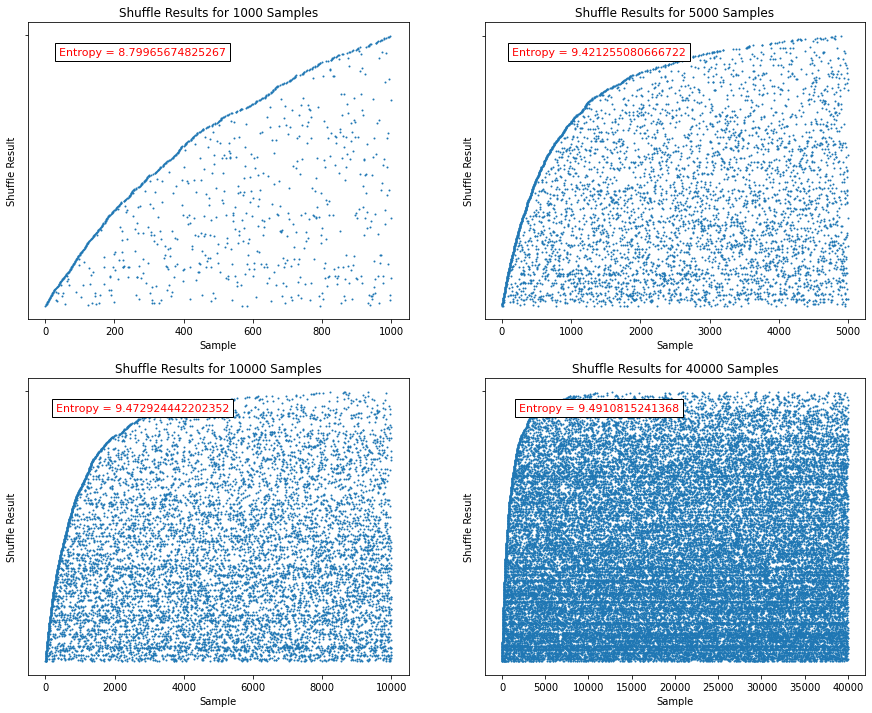

In [ ]:
#Test for a deck size of 6

deckSize = 6
print("Results for a Deck Size of",deckSize)
print("=============================")
print("")
full_test(deckSize)

Results for a Deck Size of 8

Theoretical Maximum Entropy: 15.29920801838728



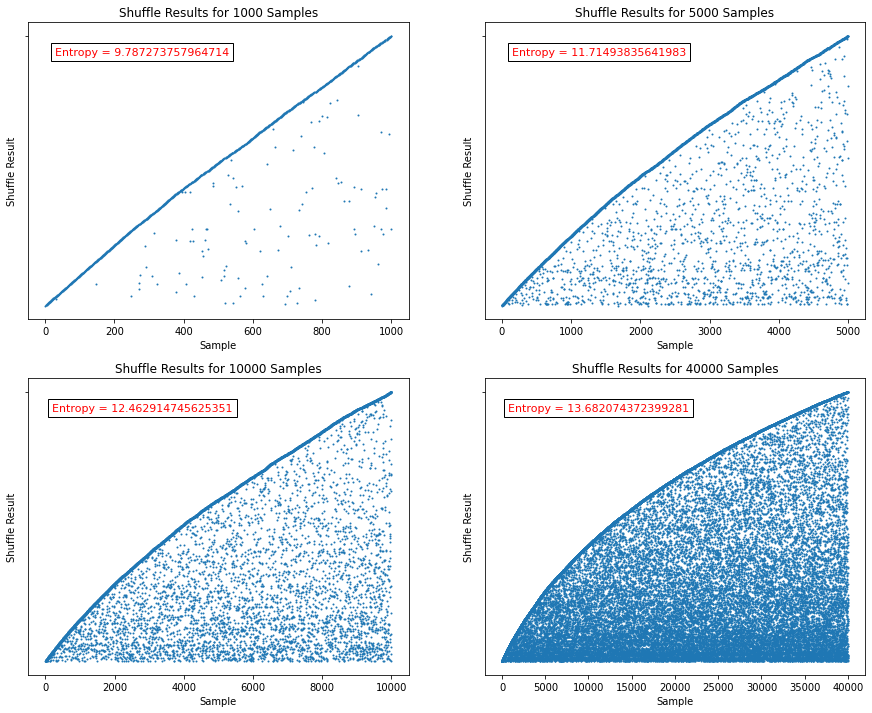

In [ ]:
# Test for a deck size of 8

deckSize = 8
print("Results for a Deck Size of",deckSize)
print("=============================")
print("")
full_test(deckSize)

Results for a Deck Size of 16

Theoretical Maximum Entropy: 44.25014046988262



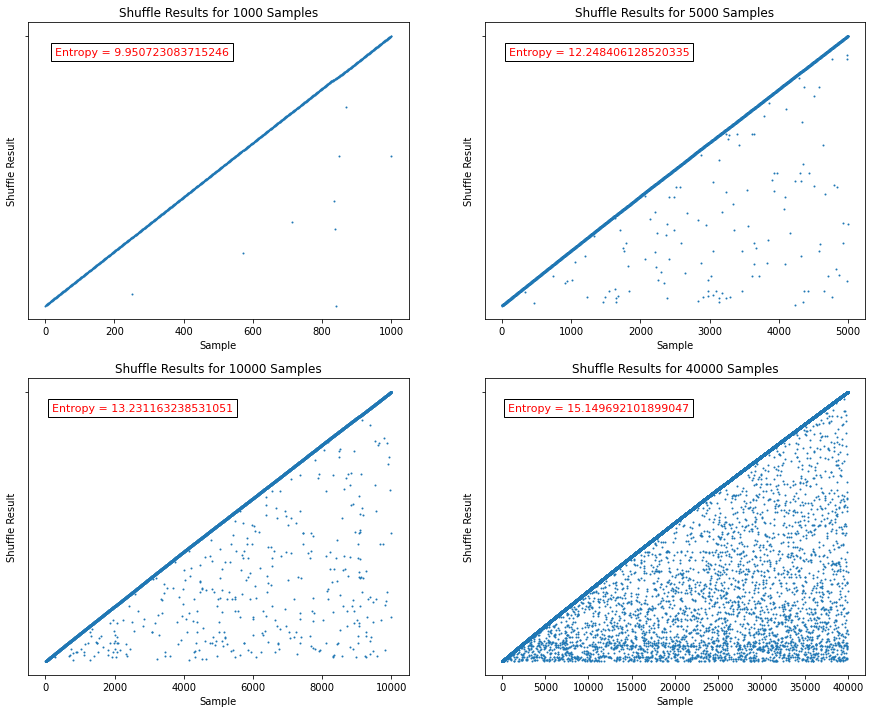

In [ ]:
# Test for a deck size of 16

deckSize = 16
print("Results for a Deck Size of",deckSize)
print("=============================")
print("")
full_test(deckSize)

## **Results & Discussion**

In analyzing the data that the above code cells produced, I was able to gain a ton of insight into the properties of my algorithm, specifically regarding how 'truly random' the shuffling it performs actually is.

One will see in my first set of graphs, that when the deck of cards is only comprised of 6 cards, the algorithm demonstrates some interesting behaviour. For lower numbers of samples, the algorithm appears to have some issues. Specifically, there is a very strong tendancy of the algorithm to follow what appears to be a linear path. Note that this path arises from the fact that we are starting with a deck in ascending order, which as mentioned earlier when interpreted as an integer gives the lowest possible 'value'. If the deck were initialized to be in some random order, this trend wouldn't be so obvious. Despite this fact, we can still see from the graph, as well as the comparison between it's entropy and the theoretical entropy, that the algorithm does not sample very evenly. However, one will notice that as the number of samples taken are allowed to increase, the results change. For 40000 samples, the algorithm appears to give much more random results (apart from the initialization stage). This is also reflected in the entropy, which begins to approach it's theoretical upper limit.

Moving on to the next two sets of graphs, we see that the results follow the exact same trend. The only difference is that when the number of cards in the deck are increased, we require a LOT more samples to gain some sense of true uniformity. For a 16 card deck, even after 40000 samples are taken, the algorithm does an extremely poor job at evenly sampling the deck combinations. This is also evident in comparing any of these entropies to their theoretical upper bounds.

This poor performance is due to the nature of a deck of cards. For example consider again our exmaple of a 6 card deck. This deck has $6! = 720$ possible combinations. Thus, when taking many more than 720 samples, my shuffle algorithm eventually begins to do a good job of evenly sampling, so it is quite random in that regard. However, consider the deck of 16 cards, which has $16! \approx 2.09 \times 10^{13}$ possible combinations. In order to allow our algorithm to begin producing truly uniform sampling, we would need many more samples than that, which for Python, is completely inefficient. To go even further consider a regular deck of 52 cards. This deck has 52! possible combinations which is an *unfathomably* large number, and would be impossible for us to ever reproduce a viable uniform distribution of samples for this number. 

Keeping all of this in mind, we can conclude that for large numbers of samples, this algorithm is fairly random, but only when dealing with very small decks of cards.

# **Problem 2.5.2 Testing Cellular Automata for Randomness**

## **Problem 2.5.2 A**

## **Methodology**

In the first part of this problem, I was tasked with testing all of the elementary CA rules for true randomness. To do so, I used previous entropy techniques to calculate relative entropies for each of the elementary rules. I employed these techniques to test specifically which of the rules appeared to evenly sample over one, two, and three bits.

To do so, I began by tackling the CA's sampling over one bit, and considered one bit at a time. I first used previous methods to essentially calculate the entropy of one cell, by allowing the CA to run for a while, and then counting the number of times a cell took on a specific value, in my case 1. Then, using the number of steps that the CA was ran for, I was able to easily calculate the probability of that cell taking on a value 1, which in turn allowed me to calculate the entropy for that cell. To calculate the entropy of the entire CA rule, I repeated this process for each of the cells, and then took the average of all entropies. All that was left to do after this, was to repeat the entire process for each rule, which I was able to do effectively in my code.

As for the case of sampling over two and three bits, I performed essentially the exact same thing, except this time I begain considering a different number of cells. For two bits, I started by considering two cells, and moved through the CA's evolution to the same amount of steps, and once again calculated the entropy in the same manner as before. Then of course, I repeated the process once again considering three cells, to analyze each rules' uniformity of sampling over 3 bits.

After all this was done, I had obtained a ton of useful data in regard to the aspect of randomness for each elementary CA rule. I performed a couple more tests, such as finding the rules whose entropy results were highest, and plotted them to see if this method of checking for randomness was actually viable for our purposes.


## **Code**

In [ ]:
# step function from the assignment notes
def cellular1d_step(value, rule_number):
  lookup = np.unpackbits( np.uint8(rule_number) )[::-1]
  triple = np.roll(value,+1)*4 + value*2 + np.roll(value,-1) 
  return lookup[triple]

# sequence function from the assignment notes
def automata1d_sequence(nsteps, ncells, rule_number, seed=None):
  value = np.zeros(ncells, dtype=np.int8)
  value[ ncells//2 ] = 1
  grid = np.ndarray( [nsteps, ncells], dtype=np.int8)
  for n in range(nsteps):
      value = cellular1d_step(value, rule_number=rule_number)
      grid[n,:] = value
  
  return np.array( [grid] ).reshape(nsteps,ncells).astype(np.uint8)

'''defining a function that will calculate the entropy of a CA. It takes
bit_sample as an arguement which is an integer that will decide how many
bits / cells to sample over while performing the entropy calculation'''
def entropy_calculator(bit_sample):
  ENTS = [] 

  '''counts the number of ones that appear in each of the either one bit, two bit, or
  three bit group over the full progression of the cellular automata '''
  for rulenum in rules:
    grid = automata1d_sequence(nsteps, ncells, rule_number=rulenum)
    cell_entropies = []
    for cell in range(0,ncells,bit_sample):
      one_count = 0
      for row in range(nsteps):
        for i in range(0,bit_sample):
          one_count += grid[row][cell+i]

      '''calculates entropy of the specific 1/2/3 bit "column"'''
      if one_count > 0:
        cell_ent = -( (one_count / (nsteps*bit_sample))*math.log(one_count / (nsteps*bit_sample), 2) )
      else:
        cell_ent = 0

      cell_entropies += [cell_ent]
    
    '''calculates the average entropy over the full CA and adds it to an array, 
    along with it's corresponding rule number'''
    entropy = np.sum(cell_entropies) / len(cell_entropies)
    ENTS += [["Rule "+str(rulenum), entropy]]

  return ENTS # returns the full list of entropy values

# creating a list containing all elementary CA rule numbers
rules = []
for i in range(2**8):
  rules += [i]

ncells = 300
nsteps = 130

'''calls the entropy calculator function for a bit_sample value of 1 2 and 3
to obtain 3 arrays containing all of the entropy data of interest'''
ents_1bit = entropy_calculator(bit_sample = 1)
ents_2bit = entropy_calculator(bit_sample = 2)
ents_3bit = entropy_calculator(bit_sample = 3)

''' this block creates a new array similar to the last 3 containing
the average values of all the entropy values for each rule'''
avg_ents =[]
for i in range(len(ents_1bit)):
  ent = ( ents_1bit[i][1] + ents_2bit[i][1] + ents_3bit[i][1] ) / 3
  avg_ents += [["Rule "+str(i), ent]]

#printing instructions to print all of the arrays
print("Entropies of Each Rule, Sampling over 1 bit: ",ents_1bit)
print("Entropies of Each Rule, Sampling over 2 bits: ",ents_2bit)
print("Entropies of Each Rule, Sampling over 3 bits: ",ents_3bit)
print("\nAverage Entropies of Each Rule:",avg_ents)

Entropies of Each Rule, Sampling over 1 bit:  [['Rule 0', 0.0], ['Rule 1', 0.49666666666666665], ['Rule 2', 0.02340789271009485], ['Rule 3', 0.5007192333897018], ['Rule 4', 0.0], ['Rule 5', 0.495], ['Rule 6', 0.03182978778309099], ['Rule 7', 0.5000110651290723], ['Rule 8', 0.0], ['Rule 9', 0.5012689398018013], ['Rule 10', 0.02340789271009485], ['Rule 11', 0.499999430867078], ['Rule 12', 0.0], ['Rule 13', 0.4346010890633113], ['Rule 14', 0.040200400804805074], ['Rule 15', 0.4999630063600686], ['Rule 16', 0.02340789271009485], ['Rule 17', 0.5007192333897018], ['Rule 18', 0.20619051368159053], ['Rule 19', 0.5000110651290723], ['Rule 20', 0.031829787783090986], ['Rule 21', 0.5000110651290723], ['Rule 22', 0.24847421788135943], ['Rule 23', 0.5], ['Rule 24', 0.02340789271009485], ['Rule 25', 0.500695955972293], ['Rule 26', 0.20619051368159053], ['Rule 27', 0.499999430867078], ['Rule 28', 0.0898698612834925], ['Rule 29', 0.49666666666666665], ['Rule 30', 0.3788329584155586], ['Rule 31', 0.5],

In [ ]:
# Finding 5 max entropies for 1 bit sampling

'''sorts the array of entropies in order of descending entropies, and
then prints the 5 highest entropies with the corresponding rule names'''

ordered_ents_1 = sorted(ents_1bit, key=lambda tup: tup[1], reverse=True)

print("Rules with Highest Entropies for Sampling over 1 bit")
print("-----------------------------------------------------")
for rules in range(5):
  print('   ',str(rules+1)+'. ',ordered_ents_1[rules][0],' \t', ordered_ents_1[rules][1])

Rules with Highest Entropies for Sampling over 1 bit
-----------------------------------------------------
    1.  Rule 105  	 0.50890522892329
    2.  Rule 41  	 0.5013710664326172
    3.  Rule 97  	 0.5013710664326171
    4.  Rule 9  	 0.5012689398018013
    5.  Rule 65  	 0.5012689398018013


In [ ]:
# Finding 5 max entropies for 2 bit sampling

'''sorts the array of entropies in order of descending entropies, and
then prints the 5 highest entropies with the corresponding rule names'''

ordered_ents_2 = sorted(ents_2bit, key=lambda tup: tup[1], reverse=True)

print("Rules with Highest Entropies for Sampling over 2 bits")
print("------------------------------------------------------")
for rules in range(5):
  print('   ',str(rules+1)+'. ',ordered_ents_2[rules][0],' \t', ordered_ents_2[rules][1])

Rules with Highest Entropies for Sampling over 2 bits
------------------------------------------------------
    1.  Rule 73  	 0.5143606230470125
    2.  Rule 105  	 0.5143312990397653
    3.  Rule 97  	 0.5014182968930999
    4.  Rule 41  	 0.5014180145754475
    5.  Rule 65  	 0.5014160475169085


In [ ]:
# Finding 5 max entropies for 3 bit sampling

'''sorts the array of entropies in order of descending entropies, and
then prints the 5 highest entropies with the corresponding rule names'''

ordered_ents_3 = sorted(ents_1bit, key=lambda tup: tup[1], reverse=True)

print("Rules with Highest Entropies for Sampling over 3 bits")
print("------------------------------------------------------")
for rules in range(5):
  print('   ',str(rules+1)+'. ',ordered_ents_3[rules][0],' \t', ordered_ents_3[rules][1])

Rules with Highest Entropies for Sampling over 3 bits
------------------------------------------------------
    1.  Rule 105  	 0.50890522892329
    2.  Rule 41  	 0.5013710664326172
    3.  Rule 97  	 0.5013710664326171
    4.  Rule 9  	 0.5012689398018013
    5.  Rule 65  	 0.5012689398018013


In [ ]:
# Finding 5 max AVERAGE entropies

'''sorts the array of avg entropies in order of descending entropies, and
then prints the 5 highest avg entropies with the corresponding rule names'''

ordered_avgs = sorted(avg_ents, key=lambda tup: tup[1], reverse=True)

print("Rules with Highest Average Entropies")
print("------------------------------------------------------")
for rules in range(5):
  print('   ',str(rules+1)+'. ',ordered_avgs[rules][0],' \t', ordered_avgs[rules][1])

Rules with Highest Average Entropies
------------------------------------------------------
    1.  Rule 105  	 0.5123348023531521
    2.  Rule 73  	 0.5039727029512581
    3.  Rule 41  	 0.5014036340902878
    4.  Rule 97  	 0.5014035375106066
    5.  Rule 65  	 0.5013615862508164


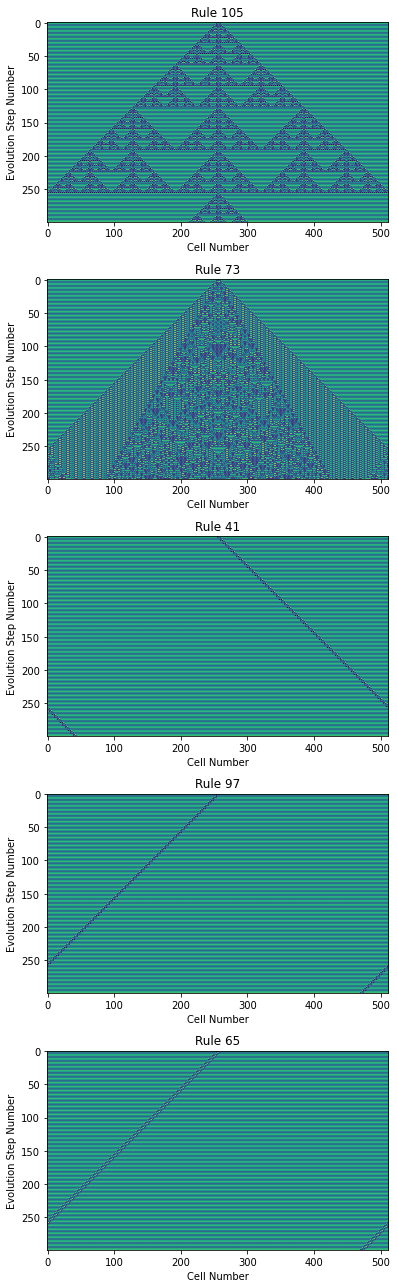

In [ ]:
# Plotting the 5 most "random" rules according to average entropy

'''uses a slightly modified version of the code in the assignment 
to plot 5 CA. The rules list is initiated to be the 5 rules with 
the highest average entropies, and then each one is plotted'''

rules = [105, 73, 41, 97, 65]
ncells = 512
nsteps = 299

fig, axes = plt.subplots(len(rules), 1, figsize=(6,18) )
for indx,rulenum in enumerate(rules):
    grid = automata1d_sequence(nsteps, ncells, rule_number=rulenum)
    axes[indx].imshow(grid)
    axes[indx].set_xlabel('Cell Number')
    axes[indx].set_ylabel('Evolution Step Number')
    axes[indx].set_title('Rule '+str(rulenum))

plt.tight_layout()

## **Results & Discussion**

As seen in the results of my code, I was able to succesfully calculate all of the entropy quantities that were introduced in the previous section.

I found that according to my entropy calculation method, rule 73 did the best job of evenly sampling over 1 bit, and rule 105 did the best job of evenly sampling over 2 and 3 bits. Overall, rule 105 did the best job of evenly sampling on average.

In plotting these CA, I found some interesting results. First of all, it is important to note that these plots contain many cells, and are essentially extremely zoomed out, so to the human eye, they are a little hard to distinguish. If we look at the action done by each of the CA rules by observing the array like object it creates, it is extremely easy to pick out patterns, and say that they don't look very random. However, if we instead consider the randomness of each rule by looking at how each row of cells changes with every step, we can come to some more definitive conclusions. 

Right off the bat, it is pretty clear that the reason why rule 41, 97, and 65 had such high entropies is due to the fact that when we look at the evolution of just one, two or three bits (can be viewed as a column in our plots) the CA perform a very repetitive pattern of going back and forth between 1s and 0s. Thus, when we calculate the entropy for each of these columns, this repetive nature gives the impression that the CA is doing a great job at sampling evenly, when in reality, it is really just producing a simple pattern. Obviously in these 3 rules there is a small anomaly, given that a sort of diagonal line is formed by the evolution, but overall, the repetive nature is still there.

On the other two hands, rule 105 and 73 give some much more interesting results. Although they both appear to exhibit an obvious symmetric pattern when viewed as a whole, if we consider the evolution of each step individually instead, we can see how these rules give the impression of being more random. 

In rule 105, we see that the CA seems to cause cells to split off from eachother at somewhat less predictable instances. Thus, rule 105 definitely does exhibit a less predictable routine, making way for a more random evolution. 

Rule 73 does something similar to rule 105, but to an even greater extent. Within the central part of the array, we can see that the CA begins to exhibit behaviour that almost seems to become slightly chaotic. There are many different splits and patterns within this rule, but it is hard to exactly figure out an *overall* pattern. For this reason, I came to the conclusion that of these 5 CA rules with the highest entropies, rule 73 seemed to be the most truly random.

Although I have not displayed them here, in plotting some of the other CA rules, I found that there were some, who despite having lower entropy, actually appeared more random in nature. For this reason, I also made the assumption that this method (employing these entropy calculations) was perhaps not the most most viable method of comparing the true randomness of the different elementary CA rules.

## **Problem 2.5.2 B**

## **Methodology**

For this part of the problem, I was tasked with investigating ternary CAs, as opposed to binary. Specifically, I did performed analysis in regard to totalistic CA.

To begin, I first had to use Python to investigate the properties of rule 912. To do so, I took a more general approach, and created a program that could plot any of these totalistic CAs, which came in handy for the following problem anyway. To do so, I defined a function that took the rule number as input, and effectively applied the rule to one bit. The way this was done, was by first converting the rule number into ternary, and then updating the cell according to this the sum of the cell above it and it's two neighbours.

I then basically initiated an emtpy array, and iterated through the array, updating each cell according to the given rule. This is definitely not the most efficient method, which was realized later on in this problem, however it is simplistic, and I was still able to get my code running succesfully.

Following analyzing rule 912, I then moved on to generalizing the problem, and similarly to in part A, calculated the relative entropies of each CA rule. This proved to be a bit more challenging, due to the efficiency issues with my code. Despite this I was still able to go about calculating the entropies in a similar manner to that done previously. One change that I did make to the entropy calculation process to improve efficiency, was to use Numpy array arithmetic, instead of the basic Python method that was previously employed. 

Overall, after the entropies were calculated I simply compared them as was done before, and plotted some of the larger entropy rules.

*Note: I wasn't sure if my code would be ran during marking, or if the one marking it would just observe the saved outputs, so I included a user input for the slower cell, that way a more efficient but technically less accurate version would be ran. The saved output however is that of the full method. The full method takes around 8 full minutes to run.*

## **Code**

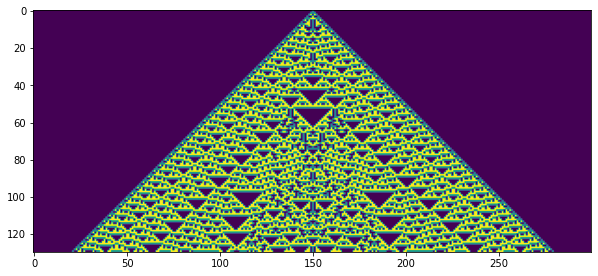

In [ ]:
# this code cell produces a display of the behaviour of totalic code 912

'''defines a function that takes a rule number as an arguement, and based on
the rule applies the proper algorithm to update a single cell'''
def update(rulenum):
  # converts the rulenumber to base 3 and uses this to formulate the algorithm
  ternary = np.base_repr(rulenum, base=3)
  bits = [int(x) for x in str(ternary)]
  bits.reverse()
  while len(bits) < 7:
    bits += [0]

  # assigns a value to this cell based on what the sum of the above cell and
  # it's neighbours are, according to the given rule
  for j in range(len(bits)):
    if sum == j:
      return bits[j]

ncells = 300
nsteps = 130
array = np.zeros([nsteps,ncells])
array[0][ncells // 2] = 1
rule_number = 912 #we are only interested in rule 912 but this works for all others

# iterates through our array and assigns values to each cell according to the rule
for row in range(nsteps-1):
  for cell in range(ncells-1):
     sum = array[row][cell-1] + array[row][cell] + array[row][cell+1]
     array[row+1][cell] = update(rule_number)

# updates the final cell requires an extra line as we can't index it properly in the loop
array[-1][-1] = array[-2][-2] + array[-2][-1] + array[-2][0]

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(array)

In [ ]:
# calculating the entropy of each totalistic CA rule
import numpy as np
import matplotlib.pyplot as plt
import math

def update(rulenum):
  # converts the rulenumber to base 3 and uses this to formulate the algorithm
  ternary = np.base_repr(rulenum, base=3)
  bits = [int(x) for x in str(ternary)]
  bits.reverse()
  while len(bits) < 7:
    bits += [0]
  # assigns a value to this cell based on what the sum of the above cell and
  # it's neighbours are, according to the given rule
  for j in range(len(bits)):
    if sum == j:
      return bits[j]

rules = []
for i in range(3**7):
  rules += [i]

# takes input to determine which version of code is ran
while True:
  TEST = int(input("To Run the Efficient Version Enter 1, to Run Full Version Enter 2"))
  if TEST == 1:
    ncells = 30
    nsteps = 13
    break
  if TEST == 2:
    ncells = 300
    nsteps = 130
    break
  

ENTS = []

for rulenum in rules:
  #performs same array building algorithm from previous cell but using rulenum for the rule
  
  array = np.zeros([nsteps,ncells])
  array[0][ncells // 2] = 1
  rule_number = rulenum 

  for row in range(nsteps-1):
    for cell in range(ncells-1):
      sum = array[row][cell-1] + array[row][cell] + array[row][cell+1]
      array[row+1][cell] = update(rule_number)
  array[-1][-1] = array[-2][-2] + array[-2][-1] + array[-2][0]

  # Calculates the entropy using Numpy arithmetic
  cell_sums = array.sum(axis=0)
  cell_probs = cell_sums / nsteps
  cell_ents = -(cell_probs)*np.log2(cell_probs, out=np.zeros_like(cell_probs), where=(cell_probs!=0))
  
  entropy = np.sum(cell_ents)/len(cell_ents)
  ENTS += [["Rule "+str(rulenum), round(entropy,8)]]

print("Entropies: ", ENTS)

To Run the Efficient Version Enter 1, to Run Full Version Enter 22
Entropies:  [['Rule 0', 0.00018006], ['Rule 1', 0.495], ['Rule 2', 3.685e-05], ['Rule 3', 0.24802403], ['Rule 4', 0.4983217], ['Rule 5', 7.37e-05], ['Rule 6', 0.00103594], ['Rule 7', 0.49828624], ['Rule 8', -3.713e-05], ['Rule 9', 0.00018006], ['Rule 10', 0.5113593], ['Rule 11', 0.01422349], ['Rule 12', 0.31011116], ['Rule 13', 0.4953709], ['Rule 14', 7.37e-05], ['Rule 15', 0.32716609], ['Rule 16', 0.49379471], ['Rule 17', -3.713e-05], ['Rule 18', 0.00018006], ['Rule 19', 0.48474774], ['Rule 20', 0.00018367], ['Rule 21', 0.36835119], ['Rule 22', 0.49120897], ['Rule 23', 7.37e-05], ['Rule 24', 0.34600249], ['Rule 25', 0.4911735], ['Rule 26', -3.713e-05], ['Rule 27', 0.00018006], ['Rule 28', 0.35539999], ['Rule 29', 3.685e-05], ['Rule 30', 0.29027307], ['Rule 31', 0.15569238], ['Rule 32', 0.00333333], ['Rule 33', 0.00103594], ['Rule 34', 0.21934251], ['Rule 35', -3.713e-05], ['Rule 36', 0.00018006], ['Rule 37', 0.01150909

In [ ]:
# displays highest unique entropies and their corresponding rules

ordered_tern_ents = sorted(ENTS, key=lambda tup: tup[1], reverse=True)

# through testing I found that this allowed me to get a good representation of
# the rules with higher entropies, without repeating entropies
print("Totalistic Ternary Rules with Highest Unique Entropies")
print("------------------------------------------------------")
for index, rules in enumerate(range(0,200,40)):
  print('   ',str(index+1)+'.  ',ordered_tern_ents[rules][0],' \t', ordered_tern_ents[rules][1])

Totalistic Ternary Rules with Highest Unique Entropies
------------------------------------------------------
    1.   Rule 10  	 0.5113593
    2.   Rule 1057  	 0.4983217
    3.   Rule 1876  	 0.4953709
    4.   Rule 751  	 0.49120897
    5.   Rule 1075  	 0.46116363


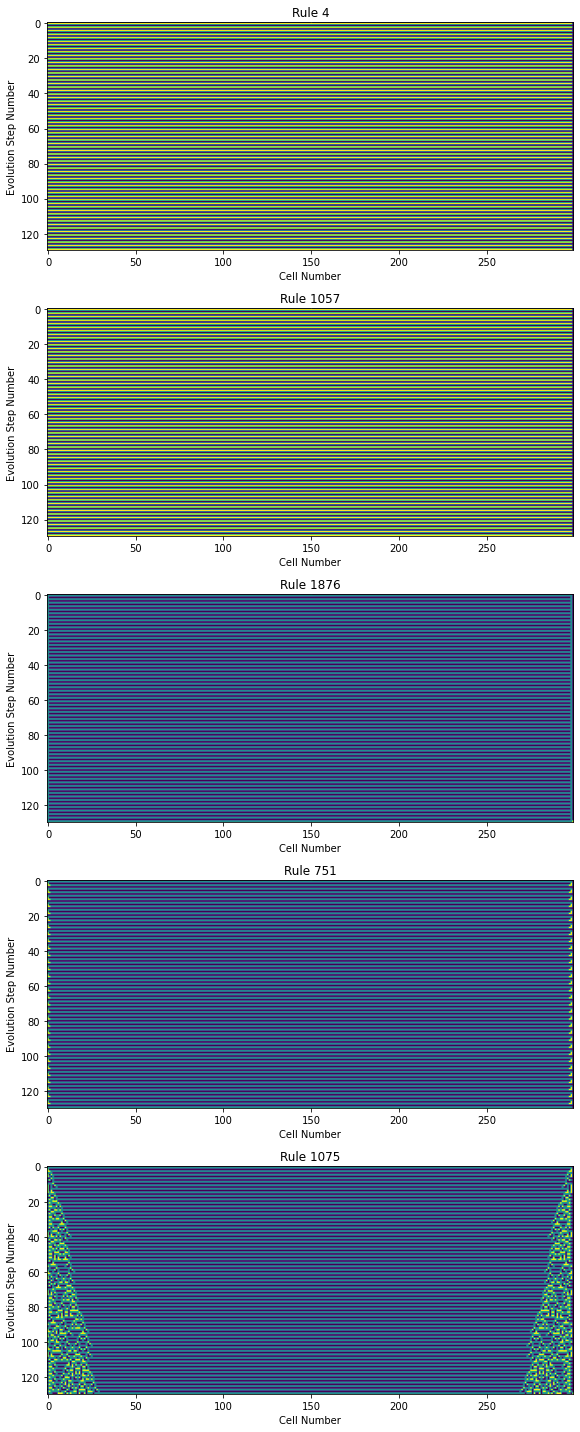

In [ ]:
# Plotting the 5 highest entropy rules (that produce unique CA)

fig, ax = plt.subplots(5,1,figsize=(25,20))

ncells = 300
nsteps = 130
array = np.zeros([nsteps,ncells])
array[0][ncells // 2] = 1

rule_number = 334 #we are only interested in rule 912 but this works for all others
rules_list = [4,1057,1876,751,1075]
# iterates through our array and assigns values to each cell according to the rule
for indx, rule_number in enumerate(rules_list):
  for row in range(nsteps-1):
    for cell in range(ncells-1):
      sum = array[row][cell-1] + array[row][cell] + array[row][cell+1]
      array[row+1][cell] = update(rule_number)

  # updates the final cell requires an extra line as we can't index it properly in the loop
  array[-1][-1] = array[-2][-2] + array[-2][-1] + array[-2][0]

  ax[indx].set_xlabel('Cell Number')
  ax[indx].set_ylabel('Evolution Step Number')
  ax[indx].set_title('Rule '+str(rule_number))
  ax[indx].imshow(array)
  

plt.tight_layout()

## **Results & Discussion**

From the results, we can clearly see some very similar trends to the last problem.

First of all, upon comparing my recreation of Rule 912 with that from Wolfram Mathworld, I found that it was a perfect match. Thus, I was able to deduce that my algorithm for applying and executing the rules was working properly.

One interesting thing that I found, was that many of the rules produced identical outputs. At first, I assumed that there was an issue, however, upon a further read into Wolfram's article about these specific CA, I was reassured by the fact that this is completely expected.

Due to this, I technically did not plot the 5 Rules with the highest entropy, as they were all the same. I instead opted to plot the 5 rules, whose entropies were both highest *and* unique. In doing so, I was able to recognize similar trends to those seen in the previous problem using binary CA. Three of the five rules, seemed to not actually be truly random at all, instead, they were just comprised of a very repetive pattern between generations of evolution. This, once again caused the entropy to be at a maximum, desptite the true randomness being farily low. Once again, two of the plots did show more random nature. Rule 1075 appeared to show some near chaotic behaviour around the outer cells, similar to Rule 73 for the binary CA. Rule 10 on the other hand, demonstrated similar behaviour to that of Rule 105 of the elementary binary CA, which had a discernable pattern, but nonetheless displayed some degree of randomness.

# **Bonus**

In [ ]:


import numpy as np
import matplotlib.pyplot as plt
from numpy import random
import math
import matplotlib.animation as animation
from celluloid import Camera

fig = plt.figure(figsize=(5,5))
camera = Camera(fig)

def ruleMaker(rulenum):
  val = '{:006b}'.format(rulenum)
  rule = []
  for j in val:
    rule += [int(j)]

  return rule

def update_life(board):
  for row in range(height-1):
    for cell in range(width-1):
        sum = board[row][cell] + board[row+1][cell] + board[row-1][cell] + board[row][cell+1] + board[row][cell-1]
        
        board[row][cell] = rule[-int(sum)]
  return board


height = 151
width = 151

board = np.zeros(shape=(height,width))
board[height//2, width//2]=1

rule = ruleMaker(57)

#fig, axs = plt.subplots(3,3)

for i in range(100):
  #ax.imshow(board)
  board = update_life(board)
  fig = plt.imshow(board)
  camera.snap()

anim = camera.animate(interval = 1, repeat = True)
#plt.show()

anim.save('Game_of_Life.gif',writer='pillow',fps=5)

print("Please See Saved .gif File")

ModuleNotFoundError: ignored

# **Conclusion**

Overall, the main thing that I took from this assignment was the fact that in some cases, although entropy is a good measure of how evenly sampled a psuedo-random process is, it isn't always a good representation of how truly random the results are.